In [1]:
import numpy as np
from tr_functions.general import GeneralModel
from tr_functions.gaussian import GaussianModel
from tr_functions.kppv import KppvModel
from tr_functions.parzen import ParzenModel
from tr_functions.linear import LinearSeparationModel

In [2]:
split_data_tp1_app = GeneralModel.open_file('data/data_tp1_app.txt')
split_data_tp1_dec = GeneralModel.open_file('data/data_tp1_dec.txt')

split_data_tp2_app = GeneralModel.open_file('data/data_tp2_app.txt')
split_data_tp2_dec = GeneralModel.open_file('data/data_tp2_dec.txt')

split_data_tp3_app = GeneralModel.open_file('data/data_tp3_app.txt')
split_data_tp3_dec = GeneralModel.open_file('data/data_tp3_dec.txt')

## Analyse visuelle
### Dataset 1

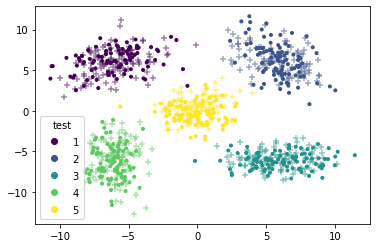

In [3]:
general = GeneralModel()
general.train_data = split_data_tp1_app
general.test_data = split_data_tp1_dec
general.plot_all_data()

On remarque que les jeux de données d'apprentissage (croix plus clair) et de test (points sombres) se superposent relativement bien a l'exception de quelques outliers dans chaque classe. Normalement les différents modèles devraient séparer les classes avec une bon niveau de confiance. Dans cet exemple, la séparation des classes peut se faire manuellement. 

### Dataset 2

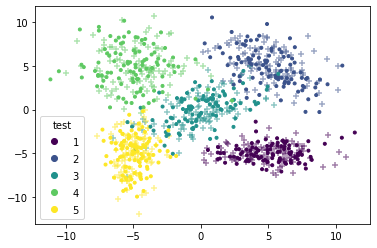

In [8]:
general = GeneralModel()
general.train_data = split_data_tp2_app
general.test_data = split_data_tp2_dec
general.plot_all_data()

Contrairement au premier jeu de données, les classes semblent plus diffusent que ce soit pour les jeux d'apprentissage et de test. En revanche on remarque que les classes sont constante entre les deux jeux de données. Les résultats des différents modèles seront moins bon que pour le premier jeu. La séparation des classes peut se faire manuellement avec quelques difficultés.

### Dataset 3

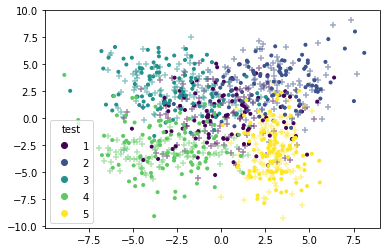

In [9]:
general = GeneralModel()
general.train_data = split_data_tp3_app
general.test_data = split_data_tp3_dec
general.plot_all_data()

Ce troisième jeu de données est totalement mélangé. Visuellement on ne peut pas distinguer de classes. En revanche comme pour les deux précédents jeux on remarque les classes d'apprentissage et de tests se supperposent bien. Dans ce cas précis une analyse manuelle est impossible. Il est probable que ce jeu de données donne les moins bon résultats pour les différents modèles. 

Gaussian model created
Classes centers created
Class = 1 has a center = [-6.10093065, 5.99640958]
Class = 2 has a center = [5.79953605, 6.171171379999997]
Class = 3 has a center = [5.776998600000001, -5.925827230000001]
Class = 4 has a center = [-5.924998090000001, -6.013923480000001]
Class = 5 has a center = [-0.013581480000000043, 0.2513897700000001]


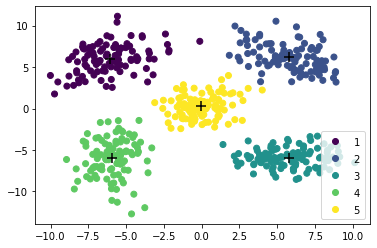

Results :
----------------
Number of elements for the learning step :  500
Number of elements for the decision step :  500
----------------

Top results :
----------------
Top 1 rate :  0.576
Top 2 rate :  0.962
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  40 │  56 │   0 │   0 │   4 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  41 │  51 │   0 │   0 │   8 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │  42 │  58 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │  34 │  60 │   6 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   4 │   0 │  95 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


In [4]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp1_app)
gaussian_model.print_classes_centers()
gaussian_model.show_train_plot()
gaussian_model.compute_method = "euclidian"
gaussian_model.test_model(split_data_tp1_dec)
gaussian_model.print_model_result()


In [5]:
# kppv = KppvModel()
# kppv.k = 5
# kppv.vote_method = "majority"
# kppv.get_k_cross_validation(split_data_tp2_app, 10, 5)
# kppv.print_k_results_cv()
# kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
# kppv.plot_all_data()
# kppv.print_model_result()
# print(kppv.k)

In [6]:
# parzen = ParzenModel()
# h_list = np.arange(0.2, 2, 0.1)
# parzen.method = "gaussian"
# parzen.get_h_cross_validation(split_data_tp1_app, h_list, 5)
# parzen.compute_parzen(split_data_tp1_app, split_data_tp1_dec)
# parzen.print_model_result()

In [7]:
# linear = LinearSeparationModel()
# model = linear.linear_train(split_data_tp1_app, True)
# linear.print_model()
# linear.test_linear_model(split_data_tp1_dec, model)
# linear.print_model_result()
# linear.plot_test_data()